 [ 1.  +0.j    0.31+0.95j -0.81+0.59j -0.81-0.59j  0.31-0.95j  1.  -0.j    0.31+0.95j -0.81+0.59j]

[[ 1.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.31+0.95j  0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [-0.  +0.j   -0.  +0.j   -0.81+0.59j -0.  +0.j   -0.  +0.j   -0.  +0.j   -0.  +0.j   -0.  +0.j  ]
 [-0.  +0.j   -0.  +0.j   -0.  +0.j   -0.81-0.59j -0.  +0.j   -0.  +0.j   -0.  +0.j   -0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.31-0.95j  0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    1.  -0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.31+0.95j  0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j   -0.81+0.59j]]


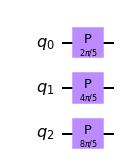

In [1]:
# This code is from Qiskit Hackathon 2021 by the team
# Qiskit for high dimensional multipartite quantum states.
#
# Author: Tim Alexis Körner
#
# (C) Copyright 2021 Hoang Van Do, Tim Alexis Körner, Inho Choi, Timothé Presles and Élie Gouzien.
#
# This code is licensed under the Apache License, Version 2.0. You may
# obtain a copy of this license in the LICENSE.txt file in the root directory
# of this source tree or at http://www.apache.org/licenses/LICENSE-2.0.
#
# Any modifications or derivative works of this code must retain this
# copyright notice, and modified files need to carry a notice indicating
# that they have been altered from the originals.

from qiskit import *
from qiskit import Aer
backend = Aer.get_backend('unitary_simulator')
import numpy as np
np.set_printoptions(linewidth=200, precision=2, suppress=True)


qudit_dimensions = [5] #later an given arguement
qd_size = int(np.ceil(np.log2(qudit_dimensions[0]))) #later not needed

q = QuantumRegister(qd_size, 'q') #later replaced with QuditRegister(qudit_dimensions)
qc = QuantumCircuit(q)

w = 2 * np.pi / qudit_dimensions[0]
for i in range(q.size):
    qc.p(w * 2**(q.size - i - 1), q[q.size - i - 1])

job = execute(qc, backend)
result = job.result()
U = result.get_unitary(qc)
print("", np.round(np.exp(1j*w)**np.arange(2**q.size), decimals=2))
print()
print(U)
qc.draw(output="mpl")
